In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist, cifar10

In [32]:
# https://www.tensorflow.org/tutorials/load_data/images
import pathlib
data_dir = pathlib.Path('train/')
val_data_dir = pathlib.Path('test/')

In [33]:
image_count = len(list(data_dir.rglob('*/*.jpg')))
print(image_count)

4244


In [34]:
images = list(data_dir.rglob('*/*.jpg'))
images[0]

WindowsPath('train/hotdog/1.jpg')

In [42]:
hotdog = list(data_dir.glob('hotdog/*.jpg'))
nothotdog = list(data_dir.glob('nothotdog/*.jpg'))

In [26]:
im = PIL.Image.open(str(hotdog[0]))
np.asarray(im).shape

(299, 299, 3)

In [99]:
import numpy as np
from PIL import Image

def load_images_from_directory(filenames):
    img_height = 180
    img_width = 180

    images = []
    for file in filenames:
        image = Image.open(file)
        image = image.resize((img_width, img_height), Image.Resampling.LANCZOS)
        images.append(np.array(image))
    return np.array(images)

In [100]:
xtrain_hotdog = load_images_from_directory(hotdog)
len(xtrain_hotdog)

2121

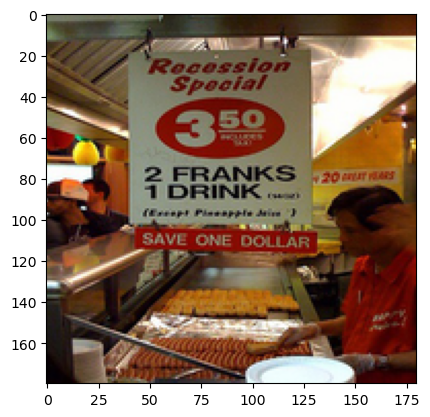

In [101]:
plt.imshow(xtrain_hotdog[0])

In [103]:
xtrain_hotdog[0].shape

(180, 180, 3)

In [104]:
ytrain_hotdog = np.ones(len(xtrain_hotdog), dtype = np.int8)

In [105]:
xtrain_not_hotdog = load_images_from_directory(nothotdog)
len(xtrain_not_hotdog)

2121

In [106]:
ytrain_nothotdog = np.zeros(len(xtrain_not_hotdog), dtype = np.int8)

In [120]:
X = np.concatenate([xtrain_hotdog, xtrain_not_hotdog])

In [121]:
X = np.stack(X)
X.shape

(4242, 180, 180, 3)

In [108]:
y = np.concatenate([ytrain_hotdog, ytrain_nothotdog])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2024)

In [129]:
model = Sequential()
model.add(Conv2D(32, 3, activation='relu', input_shape = (180, 180, 3)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

In [131]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │     1,183,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,202,762 (4.59 MB)

 Trainable params: 1,202,762 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(
    loss='sparse_categorical_crossentropy',  
    optimizer='rmsprop',
    metrics=['acc']
)

In [133]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size = 32,
    epochs = 20
)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 319ms/step - acc: 0.5361 - loss: 281.0768 - val_acc: 0.5722 - val_loss: 0.9867
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - acc: 0.6109 - loss: 2.4828 - val_acc: 0.5527 - val_loss: 1.4448
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - acc: 0.7262 - loss: 2.1092 - val_acc: 0.5415 - val_loss: 2.0319
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 264ms/step - acc: 0.7558 - loss: 7.2620 - val_acc: 0.5156 - val_loss: 22.4570
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 45s 317ms/step - acc: 0.7870 - loss: 9.1145 - val_acc: 0.5292 - val_loss: 4.4314
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - acc: 0.8681 - loss: 1.2453 - val_acc: 0.5698 - val_loss: 9.2931
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 247ms/step - acc: 0.8687 - loss: 0.9993 - val_acc: 0.5586 - val_loss: 4.5795
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - acc: 0.8795 - loss: 3.0002 - val_acc: 0.5492 - val_loss: 5.0270
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 250

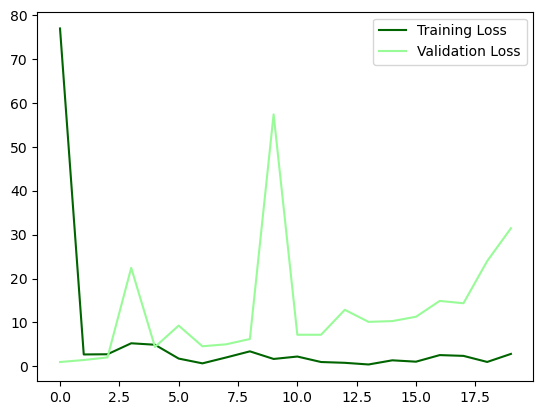

In [134]:
plt.plot(history.history['loss'], c='darkgreen', label='Training Loss')
plt.plot(history.history['val_loss'], c='palegreen', label='Validation Loss')
plt.legend();

In [135]:
model.evaluate(X_test, y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.5762 - loss: 30.7859


[31.488819122314453, 0.5680612921714783]

In [137]:
model.save('model.h5')